HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

How will you help this NGO to make a correct decision based on socio-economic and health factors?



In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data loading

In [2]:
data=pd.read_csv('/content/Country-data.csv')

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
country_data=data.iloc[:,1:10]

In [5]:
country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Data analysis

In [6]:
country_data.shape

(167, 9)

In [7]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [8]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


The above shows numerical analysis on the given dataset.The mean and std are higher in case of income

# Preprocessing

In [9]:
#Check null values
country_data.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are not any null values in the dataset.

In [10]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
country_data =scaler.fit_transform(country_data)
country_data = pd.DataFrame(country_data)
country_data.describe()

,0,1,2,3,4,5,6,7,8
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,2.383323e-16,5.218713e-16,2.871954e-16,-7.512288e-17,3.988825e-18,3.616535e-16,3.124580e-16,2.127373e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.500192e+00,-1.827827e+00,-1.939940e+00,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-6.333367e-01,-6.922106e-01,-6.914785e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-2.235279e-01,-1.810007e-01,-1.487432e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,3.747198e-01,6.515412e-01,4.913530e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,5.813835e+00,4.047436e+00,5.266181e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


In [11]:
#Normalization
from sklearn.preprocessing import Normalizer
norm=Normalizer()
country_data=norm.fit_transform(country_data)

# PCA

In [12]:
# Doing PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(country_data)
x_pca=pca.transform(country_data)
x_pca.shape

(167, 2)

In [14]:
#Displying PCA components
pca.components_

array([[ 0.45699392, -0.17835948, -0.22855917, -0.08166548, -0.32284532,
         0.1851665 , -0.47602172,  0.49299915, -0.30376855],
       [ 0.03459937,  0.5665331 , -0.09760543,  0.7687287 , -0.07412724,
        -0.17060581, -0.17461847,  0.03770426, -0.10420213]])

#Agglomerative Hierarchical Clustering

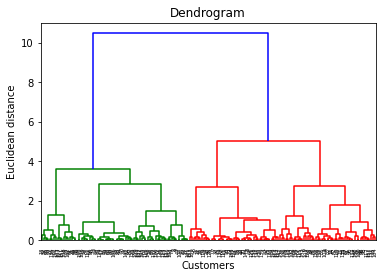

In [15]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x_pca,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x_pca)
y_hc

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1])

In [17]:
df=pd.DataFrame({"ClusterID":y_hc,"country":data['country']})

In [18]:
df.head()

,ClusterID,country
0,1,Afghanistan
1,0,Albania
2,1,Algeria
3,1,Angola
4,0,Antigua and Barbuda


In [19]:
clustered_data_hc = df.merge(data, on = 'country')
clustered_data_hc.head()

,ClusterID,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,1,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,1,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,0,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [20]:
hc_clusters_child_mort = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_exports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).exports.mean())
hc_clusters_health = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).health.mean())
hc_clusters_imports = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).imports.mean())
hc_clusters_income = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_total_fer = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_gdpp = 	pd.DataFrame(clustered_data_hc.groupby(["ClusterID"]).gdpp.mean())

In [21]:
df1 = pd.concat([pd.Series(list(range(0,2))), hc_clusters_child_mort,hc_clusters_exports, hc_clusters_health, hc_clusters_imports,
               hc_clusters_income, hc_clusters_inflation, hc_clusters_life_expec,hc_clusters_total_fer,hc_clusters_gdpp], axis=1)
df1.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df1

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,11.407527,48.923656,7.591828,50.354839,26787.204301,4.519688,76.743011,1.919355,21415.483871
1,1,72.029730,31.287824,5.840270,42.536026,5026.391892,11.881554,62.779730,4.240676,2342.891892


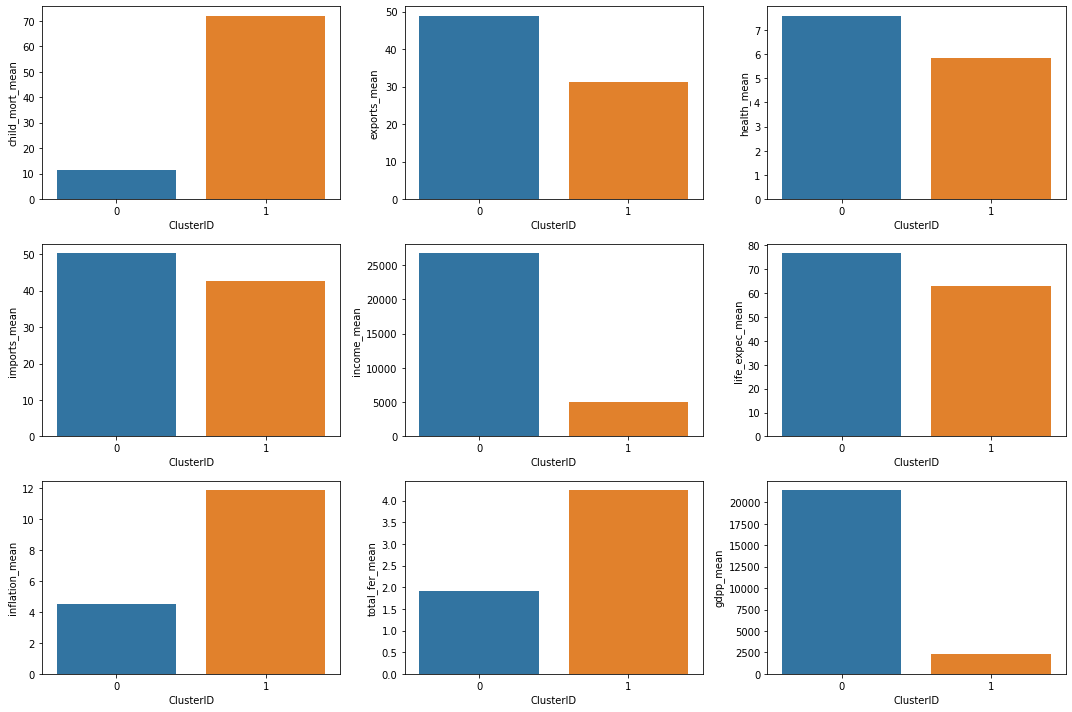

In [22]:
fig, axs = plt.subplots(3,3,figsize = (15,10))

sns.barplot(x=df1.ClusterID, y=df1.child_mort_mean, ax = axs[0,0])
sns.barplot(x=df1.ClusterID, y=df1.exports_mean, ax = axs[0,1])
sns.barplot(x=df1.ClusterID, y=df1.health_mean, ax = axs[0,2])
sns.barplot(x=df1.ClusterID, y=df1.imports_mean, ax = axs[1,0])
sns.barplot(x=df1.ClusterID, y=df1.income_mean, ax = axs[1,1])
sns.barplot(x=df1.ClusterID, y=df1.life_expec_mean, ax = axs[1,2])
sns.barplot(x=df1.ClusterID, y=df1.inflation_mean, ax = axs[2,0])
sns.barplot(x=df1.ClusterID, y=df1.total_fer_mean, ax = axs[2,1])
sns.barplot(x=df1.ClusterID, y=df1.gdpp_mean, ax = axs[2,2])
plt.tight_layout()

In [23]:
clustered_data_hc[clustered_data_hc.ClusterID == 1].country.values

array(['Afghanistan', 'Algeria', 'Angola', 'Azerbaijan', 'Bangladesh',
       'Benin', 'Bhutan', 'Bolivia', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       "Cote d'Ivoire", 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Fiji',
       'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'India', 'Indonesia', 'Iraq', 'Kazakhstan',
       'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mongolia', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger',
       'Nigeria', 'Pakistan', 'Philippines', 'Rwanda', 'Samoa', 'Senegal',
       'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sri Lanka',
       'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Tonga',
       'Turkmenistan', 'Uganda', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Yemen', 'Zambi

# RESULT

1.Cluster with ClusterID as 1, is the cluster of most backward country

2.Countries on which we require to focus more are 

       'Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Micronesia, Fed. Sts.', 'Mongolia', 'Mozambique',
       'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan',
       'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Venezuela', 'Yemen',
       'Zambia'.